# References
This notebook is heavily based on the excellent ``Practical RL'' course from the Yandex
School of Data Analysis
https://github.com/yandexdataschool/Practical_RL/

# Crossentropy method

This notebook will teach you to solve reinforcement learning with crossentropy method.

In [230]:
#XVFB will be launched if you run on a server
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [231]:
import gym
import numpy as np, pandas as pd

env = gym.make("Taxi-v2")
env.reset()
env.render()

[2017-07-20 23:54:19,518] Making new env: Taxi-v2


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [232]:
n_states = env.observation_space.n
n_actions = env.action_space.n

print("n_states=%i, n_actions=%i"%(n_states,n_actions))

n_states=500, n_actions=6


# Create stochastic policy

This time our policy should be a probability distribution.

```policy[s,a] = P(take action a | in state s)```

Since we still use integer state and action representations, you can use a 2-dimensional array to represent the policy.

Please initialize policy __uniformly__, that is, probabililities of all actions should be equal.


In [233]:
policy = np.ones((n_states, n_actions), dtype=np.float64)
policy = policy / n_actions

In [234]:
assert type(policy) in (np.ndarray,np.matrix)
assert np.allclose(policy,1./n_actions)
assert np.allclose(np.sum(policy,axis=1), 1)

# Play the game

Just like before, but we also record all states and actions we took.

In [235]:
def generate_session(t_max=10**4):
    """
    Play game until end or for t_max ticks.
    returns: list of states, list of actions and sum of rewards
    """
    states,actions = [],[]
    total_reward = 0.
    
    s = env.reset()
    
    for t in range(t_max):
        
        a = np.random.choice(range(n_actions), p=policy[s])
 
        new_s,r,done,info = env.step(a)
        
        states.append(s)
        actions.append(a)
        total_reward += r
        
        s = new_s
        if done:
            break
    return states,actions,total_reward
        

In [236]:
s,a,r = generate_session()
assert type(s) == type(a) == list
assert len(s) == len(a)
assert type(r) is float


# Training loop
Generate sessions, select N best and fit to those.

mean reward = -667.56800	threshold = -857.0
mean reward = -654.20133	threshold = -839.0
mean reward = -636.42400	threshold = -821.0
mean reward = -628.80667	threshold = -812.0
mean reward = -620.09733	threshold = -794.0
mean reward = -611.24133	threshold = -794.0
mean reward = -598.11467	threshold = -776.0
mean reward = -585.63467	threshold = -758.0
mean reward = -574.61200	threshold = -749.0
mean reward = -555.20667	threshold = -731.0
mean reward = -542.80267	threshold = -713.0
mean reward = -528.31067	threshold = -695.9
mean reward = -519.09867	threshold = -686.0
mean reward = -497.86533	threshold = -668.0
mean reward = -486.93467	threshold = -659.0
mean reward = -467.41067	threshold = -641.0
mean reward = -451.97733	threshold = -623.0
mean reward = -440.42267	threshold = -614.0
mean reward = -426.62933	threshold = -587.0
mean reward = -409.91467	threshold = -578.0
mean reward = -399.54800	threshold = -560.0
mean reward = -377.89733	threshold = -551.0
mean reward = -367.84267	thresho

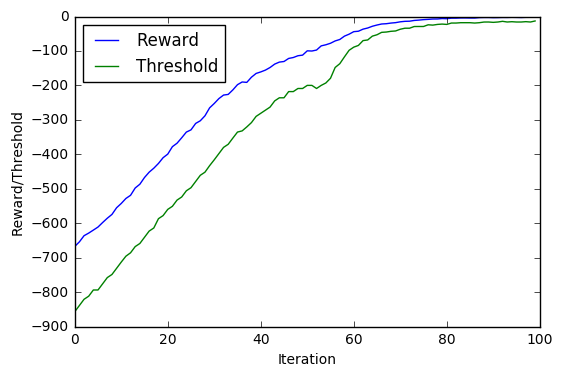

In [237]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

n_samples = 750  #sample this many samples
percentile = 15  #take this percent of session with highest rewards
smoothing = 0.1  #add this thing to all counts for stability

rewards = []
thresholds = []

for i in range(100):
    
    #%time 
    sessions = [generate_session(i) for i in range(n_samples)]

    batch_states,batch_actions,batch_rewards = map(np.array,zip(*sessions))

    #batch_states: a list of lists of states in each session
    #batch_actions: a list of lists of actions in each session
    #batch_rewards: a list of floats - total rewards at each session
    
    threshold = np.percentile(batch_rewards, percentile)
    
    elite_states = batch_states[batch_rewards > threshold]
    elite_actions = batch_actions[batch_rewards > threshold]
    
    elite_states, elite_actions = map(np.concatenate,[elite_states,elite_actions])
    #hint on task above: use np.percentile and numpy-style indexing
    
    #count actions from elite states
    elite_counts = np.zeros_like(policy)+smoothing
    
    for i in range(len(elite_states)):
        elite_counts[elite_states[i], elite_actions[i]] += 1
    
    policy = elite_counts / np.linalg.norm(elite_counts, ord=1, axis=1, keepdims=True)
    assert np.allclose(np.sum(policy,axis=1), 1)
    
    rewards.append(np.mean(batch_rewards))
    thresholds.append(threshold)
    
    print("mean reward = %.5f\tthreshold = %.1f"%(np.mean(batch_rewards),threshold))

print("mean reward = %.5f\tthreshold = %.1f"%(rewards[len(rewards)-1],thresholds[len(rewards)-1]))



plt.plot(range(0, len(rewards)), rewards)
plt.plot(range(0, len(thresholds)), thresholds)
plt.xlabel('Iteration')
plt.ylabel('Reward/Threshold')

plt.legend(['Reward', 'Threshold'], loc='upper left')
plt.show()

# Homework

### Tabular correntropy method

You may have noticed that the taxi problem quickly converges from -10k to aroung -500 score (+- 500) and stays there. This is in part because taxi-v2 has some hard-coded randomness in the environment. Other reason is that the percentile was chosen poorly.

### Tasks
- __1.1__ (5 pt) Modify the tabular CEM (CrossEntropyMethod) code to plot distribution of rewards and threshold on each tick.
- __1.2__ (5 pts) Find out how the algorithm performance changes if you change different percentile and different n_samples.

```<YOUR ANSWER>```


- __1.3__ (10 pts) Tune the algorithm to end up with positive average score.
- __1.4 bonus__ (10 pt) Try to achieve a distribution where 25% or more samples score above +9.0

It's okay to modify the existing code.
